## Analyzing Chicago Budget Data
Before establishing the new city budget, Chicago has a "budget engagement" process, surveying the residents to see where their priorities lie before implementing the new annual budget. 
This analysis does three things:
1. Shows how resident department priorities changed during the pandemic (i.e. increase investment in Community)
2. Shows how Chicagoan views on higher city taxes changed during 2020
3. Compares resident budget priorities vs. city budget priorities, normalizing and analyzing the year-over-year changes

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [101]:
# load the data
df2021 = pd.read_csv("Budget_Survey_2021.csv")

/Users/davidsmith/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [102]:
# Inspect the data
df2021

,Date,ZIP Code,$1000 Assignment - Police,$1000 Assignment - Other Public Safety,$1000 Assignment - Infrastructure Services,$1000 Assignment - Public Health,$1000 Assignment - Community,$1000 Assignment - Streets and Sanitation,$1000 Assignment - City Development,$1000 Assignment - Libraries,...,Reallocate From - None,Increase Revenue - Increase Sales Tax,Increase Revenue - Property Tax,Increase Revenue - Garbage Fee,Increase Revenue - Expand Sales Tax,Increase Revenue - Fuel Tax,Increase Revenue - None,Increase Revenue - Other,Open-Ended Response,Counter Column
0,09/11/2020,60626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,False,False,True,False,False,False,1
1,09/10/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,1
2,09/08/2020,60612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,1
3,09/08/2020,60611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,True,False,1
4,09/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38331,08/31/2020,60611,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,True,False,False,False,1
38332,08/31/2020,60614,300.0,150.0,100.0,200.0,0.0,0.0,200.0,0.0,...,False,False,False,False,True,True,False,True,True,1
38333,08/31/2020,60626,350.0,200.0,75.0,25.0,100.0,75.0,25.0,75.0,...,False,True,False,False,True,True,False,False,True,1
38334,08/31/2020,60611,250.0,250.0,250.0,50.0,50.0,50.0,50.0,20.0,...,False,False,False,False,False,False,True,False,True,1


In [103]:
# Look at data and also check for outliers 
df2021.describe([.25, .5, .9,  .99, .995])

,$1000 Assignment - Police,$1000 Assignment - Other Public Safety,$1000 Assignment - Infrastructure Services,$1000 Assignment - Public Health,$1000 Assignment - Community,$1000 Assignment - Streets and Sanitation,$1000 Assignment - City Development,$1000 Assignment - Libraries,$1000 Assignment - Regulatory,$1000 Assignment - Cultural Affairs and Special Events,...,Rank - Other Public Safety,Rank - Infrastructure,Rank - Public Health,Rank - Community,Rank - Streets and Sanitation,Rank - City Development,Rank - Libraries,Rank - Regulatory,Rank - Cultural Affairs and Special Events,Counter Column
count,36810.000000,36810.000000,36810.000000,36810.000000,36810.000000,36810.000000,36810.000000,36810.000000,36810.000000,36810.000000,...,38141.000000,38129.000000,38128.000000,38146.00000,38127.000000,38083.000000,38123.000000,38096.000000,38110.000000,38336.0
mean,64.375659,99.989948,97.751589,207.880087,224.725645,72.295653,64.591524,66.950910,40.243113,61.226406,...,5.159723,5.006924,2.658178,2.60098,5.383954,5.967965,5.846549,7.528192,6.338651,1.0
std,154.127036,83.784065,84.336499,133.673427,156.143693,54.807100,61.946057,62.353645,39.065642,60.337051,...,2.500734,2.127198,2.048152,2.19249,2.011705,2.405675,2.181043,1.847200,2.255350,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,50.000000,50.000000,111.000000,111.000000,48.000000,10.000000,25.000000,0.000000,15.000000,...,3.000000,3.000000,1.000000,1.00000,4.000000,4.000000,4.000000,7.000000,5.000000,1.0
50%,0.000000,100.000000,100.000000,200.000000,200.000000,75.000000,50.000000,50.000000,45.000000,50.000000,...,5.000000,5.000000,2.000000,2.00000,5.000000,6.000000,6.000000,8.000000,6.000000,1.0
90%,200.000000,200.000000,200.000000,400.000000,404.000000,114.000000,121.100000,111.000000,100.000000,111.000000,...,9.000000,8.000000,6.000000,6.00000,8.000000,9.000000,9.000000,9.000000,9.000000,1.0
99%,900.000000,400.000000,400.000000,591.000000,800.000000,222.000000,267.000000,250.000000,125.000000,250.000000,...,9.000000,9.000000,10.000000,10.00000,9.000000,10.000000,10.000000,10.000000,10.000000,1.0
99.5%,1000.000000,500.000000,500.000000,742.910000,1000.000000,272.910000,300.000000,300.000000,157.910000,300.000000,...,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0
max,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


In [104]:
# Plot their averages in a histogram
columns_2021 = df2021[['$1000 Assignment - Police',
       '$1000 Assignment - Other Public Safety',
       '$1000 Assignment - Infrastructure Services',
       '$1000 Assignment - Community',
       '$1000 Assignment - Streets and Sanitation',
       '$1000 Assignment - City Development', '$1000 Assignment - Libraries',
       '$1000 Assignment - Regulatory',
       '$1000 Assignment - Cultural Affairs and Special Events']]



budget_allocation_columns = (columns_2021.mean(), columns_2021.median())


budget_allocation_columns

($1000 Assignment - Police                                  64.375659
 $1000 Assignment - Other Public Safety                     99.989948
 $1000 Assignment - Infrastructure Services                 97.751589
 $1000 Assignment - Community                              224.725645
 $1000 Assignment - Streets and Sanitation                  72.295653
 $1000 Assignment - City Development                        64.591524
 $1000 Assignment - Libraries                               66.950910
 $1000 Assignment - Regulatory                              40.243113
 $1000 Assignment - Cultural Affairs and Special Events     61.226406
 dtype: float64,
 $1000 Assignment - Police                                   0.0
 $1000 Assignment - Other Public Safety                    100.0
 $1000 Assignment - Infrastructure Services                100.0
 $1000 Assignment - Community                              200.0
 $1000 Assignment - Streets and Sanitation                  75.0
 $1000 Assignment - City Dev

In [105]:
# Create the dataframe 
allocation_means = pd.DataFrame(budget_allocation_columns, index = ["Mean_2021", "Median_2021"])
allocation_means = allocation_means.T

In [106]:
# Adjust the mean so we don't consider public health, as i"t wasn't a topic pre-pandemic
allocation_means["Adjusted_Mean_2021"] = allocation_means["Mean_2021"]/.79211992
allocation_means

,Mean_2021,Median_2021,Adjusted_Mean_2021
$1000 Assignment - Police,64.375659,0.0,81.270092
$1000 Assignment - Other Public Safety,99.989948,100.0,126.230822
$1000 Assignment - Infrastructure Services,97.751589,100.0,123.405039
$1000 Assignment - Community,224.725645,200.0,283.701545
$1000 Assignment - Streets and Sanitation,72.295653,75.0,91.268571
$1000 Assignment - City Development,64.591524,50.0,81.542608
$1000 Assignment - Libraries,66.950910,50.0,84.521180
$1000 Assignment - Regulatory,40.243113,45.0,50.804319
$1000 Assignment - Cultural Affairs and Special Events,61.226406,50.0,77.294365


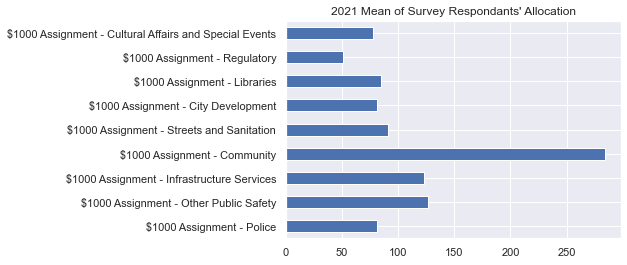

In [107]:
# Create histogram of the resident priorities in 2021
allocation_means["Adjusted_Mean_2021"].plot.barh()
plt.title("2021 Mean of Survey Respondants' Allocation")
plt.show()

In [108]:
# Now that we've seen 2021, let's look at 2020 data
df2020 = pd.read_csv("Budget_Survey_2020.csv")
df2020.describe([.25, .5, .9,  .99, .995])

,ZIP Code,$1000 Assignment - Police,$1000 Assignment - Other Public Safety,$1000 Assignment - Infrastructure Services,$1000 Assignment - Community,$1000 Assignment - Streets and Sanitation,$1000 Assignment - City Development,$1000 Assignment - Libraries,$1000 Assignment - Regulatory,$1000 Assignment - Cultural Affairs and Special Events,$1000 Assignment - Total,Counter Column
count,7169.000000,5884.000000,5707.000000,5688.000000,5418.000000,5318.000000,4830.000000,4833.000000,4718.000000,4508.000000,7347.000000,7347.0
mean,60630.573302,298.996771,164.368320,157.020921,142.065522,86.813840,69.511594,58.893234,51.283807,49.850932,804.260514,1.0
std,18.345152,236.474266,103.331376,117.597495,149.092066,68.440087,73.287629,76.443732,66.928835,66.993206,368.987468,0.0
min,60601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,60614.000000,125.000000,100.000000,100.000000,50.000000,50.000000,25.000000,20.000000,20.000000,10.000000,900.000000,1.0
50%,60630.000000,250.000000,150.000000,150.000000,100.000000,95.000000,50.000000,50.000000,50.000000,47.000000,1000.000000,1.0
90%,60656.000000,600.000000,300.000000,264.900000,300.000000,150.000000,150.000000,100.000000,100.000000,100.000000,1000.000000,1.0
99%,60661.000000,1000.000000,500.000000,600.000000,900.000000,300.000000,300.000000,300.000000,200.000000,250.000000,1000.000000,1.0
99.5%,60707.000000,1000.000000,500.000000,856.500000,1000.000000,500.000000,497.680000,500.000000,500.000000,422.320000,1000.000000,1.0
max,60803.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.0


In [109]:
# Seeing that one column was left out of 2020's survey (Public Health), 
# we will adjust the data so it's apples to apples. Starting with adding 2020 data to 2021 for comparison
budget_allocation_columns20 = df2020[['$1000 Assignment - Police',
       '$1000 Assignment - Other Public Safety',
       '$1000 Assignment - Infrastructure Services',
        '$1000 Assignment - Community',
       '$1000 Assignment - Streets and Sanitation',
       '$1000 Assignment - City Development', '$1000 Assignment - Libraries',
       '$1000 Assignment - Regulatory',
       '$1000 Assignment - Cultural Affairs and Special Events']]


allocation_means20 = pd.DataFrame(budget_allocation_columns20) 

allocation_averages = pd.DataFrame(data=(allocation_means20.mean(), allocation_means20.median()))
allocation_averages = allocation_averages.transpose()
allocation_averages = allocation_averages.rename(columns={0: "Mean_2020", 1: "Median_2020"})
index = allocation_averages.index
index.name = "Department"


In [110]:
allocation_averages

,Mean_2020,Median_2020
Department,,
$1000 Assignment - Police,298.996771,250.0
$1000 Assignment - Other Public Safety,164.368320,150.0
$1000 Assignment - Infrastructure Services,157.020921,150.0
$1000 Assignment - Community,142.065522,100.0
$1000 Assignment - Streets and Sanitation,86.813840,95.0
$1000 Assignment - City Development,69.511594,50.0
$1000 Assignment - Libraries,58.893234,50.0
$1000 Assignment - Regulatory,51.283807,50.0
$1000 Assignment - Cultural Affairs and Special Events,49.850932,47.0


In [111]:
# Check if the averages sum to 1000
allocation_averages["Mean_2020"].sum()

1078.804940465508

In [112]:
# The average is too high, so we will adjust the figures to $1000 proportionally
allocation_averages['Adjusted_Mean_2020'] = allocation_averages["Mean_2020"]/1078.80494*1000
allocation_averages

,Mean_2020,Median_2020,Adjusted_Mean_2020
Department,,,
$1000 Assignment - Police,298.996771,250.0,277.155545
$1000 Assignment - Other Public Safety,164.368320,150.0,152.361482
$1000 Assignment - Infrastructure Services,157.020921,150.0,145.550799
$1000 Assignment - Community,142.065522,100.0,131.687868
$1000 Assignment - Streets and Sanitation,86.813840,95.0,80.472230
$1000 Assignment - City Development,69.511594,50.0,64.433886
$1000 Assignment - Libraries,58.893234,50.0,54.591179
$1000 Assignment - Regulatory,51.283807,50.0,47.537608
$1000 Assignment - Cultural Affairs and Special Events,49.850932,47.0,46.209402


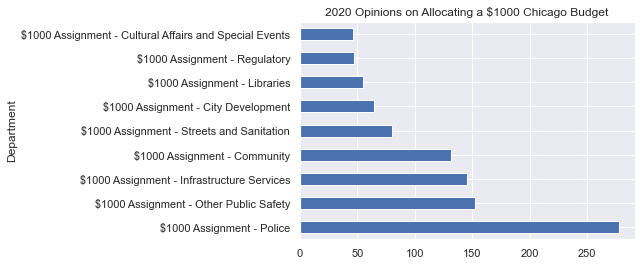

In [113]:
# Look at the 2020 data in a histogram 
allocation_averages['Adjusted_Mean_2020'].plot.barh()
plt.title("2020 Opinions on Allocating a $1000 Chicago Budget")
plt.show()

In [114]:
# Before merging data frames, let's see how many columns are common and unique
common_columns = []
unique_columns = []

def get_common_columns(df1, df2):
    for i in df1.columns:
        if i in df2.columns and i not in common_columns:
            common_columns.append(i)
        if i not in df2.columns:
            unique_columns.append(i)

get_common_columns(df2021, df2020)
unique_2021 = unique_columns
unique_columns = []

df2020.columns.isin(df2021.columns)

# Check common columns quickly
# np.intersect1d(df2020.columns, df2021.columns)
common_columns

['Date',
 'ZIP Code',
 '$1000 Assignment - Police',
 '$1000 Assignment - Other Public Safety',
 '$1000 Assignment - Infrastructure Services',
 '$1000 Assignment - Community',
 '$1000 Assignment - Streets and Sanitation',
 '$1000 Assignment - City Development',
 '$1000 Assignment - Libraries',
 '$1000 Assignment - Regulatory',
 '$1000 Assignment - Cultural Affairs and Special Events',
 'Counter Column']

In [115]:
# Loop the other way to see both, as some are probably the same info titled differently
get_common_columns(df2020, df2021)

In [116]:
unique_2020 = unique_columns
unique_columns = []


# Resident Survey Comparison - 2020 vs 2021

In [117]:
# Merge the data frames
allocation_averages = allocation_averages.join(allocation_means, how='outer')
allocation_averages

,Mean_2020,Median_2020,Adjusted_Mean_2020,Mean_2021,Median_2021,Adjusted_Mean_2021
$1000 Assignment - Police,298.996771,250.0,277.155545,64.375659,0.0,81.270092
$1000 Assignment - Other Public Safety,164.368320,150.0,152.361482,99.989948,100.0,126.230822
$1000 Assignment - Infrastructure Services,157.020921,150.0,145.550799,97.751589,100.0,123.405039
$1000 Assignment - Community,142.065522,100.0,131.687868,224.725645,200.0,283.701545
$1000 Assignment - Streets and Sanitation,86.813840,95.0,80.472230,72.295653,75.0,91.268571
$1000 Assignment - City Development,69.511594,50.0,64.433886,64.591524,50.0,81.542608
$1000 Assignment - Libraries,58.893234,50.0,54.591179,66.950910,50.0,84.521180
$1000 Assignment - Regulatory,51.283807,50.0,47.537608,40.243113,45.0,50.804319
$1000 Assignment - Cultural Affairs and Special Events,49.850932,47.0,46.209402,61.226406,50.0,77.294365


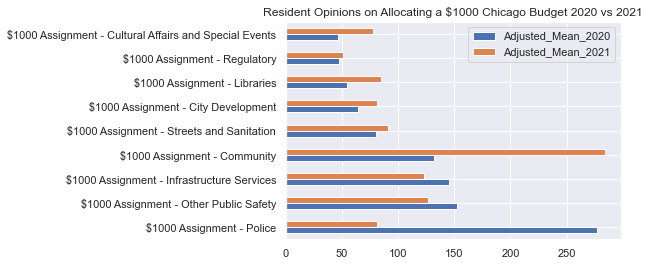

In [118]:
# Compare 2020 vs 2021 data
allocation_averages.plot(y=["Adjusted_Mean_2020", "Adjusted_Mean_2021"], kind='barh')
plt.title("Resident Opinions on Allocating a $1000 Chicago Budget 2020 vs 2021")
plt.show()

# Chicagoan priorities in 2021:
Looking at the graph above, residents feel strongly that there should be a much higher investment in community, and a much lower investment in the police. 
Next, we will inspect resident attitudes towards higher taxes

In [119]:
# Pick select columns to include for analyzing resident opinions on specific tax hikes

revenue_2020 = df2020[['Revenue Change - Garage Parking Tax',
       'Revenue Change - Ridesharing Tax', 'Revenue Change - Alcohol Tax',
       'Revenue Change - Tax on Sports, Theater, Other Entertainment',
       'Revenue Change - Cigarette Tax', 'Revenue Change - Hotel Tax',
       'Revenue Change - Shopping Bag Tax', 'Revenue Change - Property Tax',
       'Revenue Change - Sales Tax', 'Revenue Change - Permit Fees',
       'Revenue Change - License Fees',]]

revenue_2020 

    

,Revenue Change - Garage Parking Tax,Revenue Change - Ridesharing Tax,Revenue Change - Alcohol Tax,"Revenue Change - Tax on Sports, Theater, Other Entertainment",Revenue Change - Cigarette Tax,Revenue Change - Hotel Tax,Revenue Change - Shopping Bag Tax,Revenue Change - Property Tax,Revenue Change - Sales Tax,Revenue Change - Permit Fees,Revenue Change - License Fees
0,No Opinion,Keep Tax or Fee the Same,Keep Tax or Fee the Same,No Opinion,No Opinion,Increase Tax or Fee,No Opinion,NaN,NaN,NaN,NaN
1,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,NaN,NaN,Increase Tax or Fee,Increase Tax or Fee
2,No Opinion,No Opinion,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,NaN,Keep Tax or Fee the Same,Keep Tax or Fee the Same,No Opinion,No Opinion
3,Increase Tax or Fee,NaN,Increase Tax or Fee,Keep Tax or Fee the Same,Increase Tax or Fee,Increase Tax or Fee,NaN,Keep Tax or Fee the Same,NaN,Increase Tax or Fee,Increase Tax or Fee
4,Increase Tax or Fee,Increase Tax or Fee,No Opinion,No Opinion,No Opinion,No Opinion,NaN,Keep Tax or Fee the Same,Keep Tax or Fee the Same,No Opinion,No Opinion
...,...,...,...,...,...,...,...,...,...,...,...
7342,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same
7343,Keep Tax or Fee the Same,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,No Opinion,No Opinion,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Increase Tax or Fee,Keep Tax or Fee the Same
7344,No Opinion,Increase Tax or Fee,Keep Tax or Fee the Same,Increase Tax or Fee,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same
7345,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,Keep Tax or Fee the Same,No Opinion,No Opinion,No Opinion,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee,Increase Tax or Fee


In [120]:
# Map categorical data into 1's for yes and 0's for no tax hike

revenue_2020_mapped = revenue_2020.replace(["Increase Tax or Fee", "Keep Tax or Fee the Same", "No Opinion"], [1,0,0])
revenue_2020_mapped

,Revenue Change - Garage Parking Tax,Revenue Change - Ridesharing Tax,Revenue Change - Alcohol Tax,"Revenue Change - Tax on Sports, Theater, Other Entertainment",Revenue Change - Cigarette Tax,Revenue Change - Hotel Tax,Revenue Change - Shopping Bag Tax,Revenue Change - Property Tax,Revenue Change - Sales Tax,Revenue Change - Permit Fees,Revenue Change - License Fees
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0
3,1.0,NaN,1.0,0.0,1.0,1.0,NaN,0.0,NaN,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7342,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7343,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7344,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [121]:
# Replace NaN with 0
revenue_2020_mapped.fillna(0)

,Revenue Change - Garage Parking Tax,Revenue Change - Ridesharing Tax,Revenue Change - Alcohol Tax,"Revenue Change - Tax on Sports, Theater, Other Entertainment",Revenue Change - Cigarette Tax,Revenue Change - Hotel Tax,Revenue Change - Shopping Bag Tax,Revenue Change - Property Tax,Revenue Change - Sales Tax,Revenue Change - Permit Fees,Revenue Change - License Fees
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7342,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7343,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7344,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [122]:
#Find percentage of approval in each type of tax hike
revenue_2020_opinions = (revenue_2020_mapped.sum()/len(revenue_2020_mapped.index))*100
revenue_2020_opinions = pd.DataFrame(data=revenue_2020_opinions, columns=["Percentage Supporting Revenue Increase 2020"])
revenue_2020_opinions.rename(index={'Revenue Change - Garage Parking Tax': "Increase Revenue - Garage Parking Tax",
       'Revenue Change - Ridesharing Tax': 'Increase Revenue - Ridesharing Tax',
        'Revenue Change - Alcohol Tax': 'Increase Revenue - Alcohol Tax',
       'Revenue Change - Tax on Sports, Theater, Other Entertainment': 'Increase Revenue - Tax on Sports, Theater, Other Entertainment',
       'Revenue Change - Cigarette Tax': 'Increase Revenue - Cigarette Tax', 
       'Revenue Change - Hotel Tax': "Increase Revenue - Hotel Tax",
       'Revenue Change - Shopping Bag Tax': 'Increase Revenue - Shopping Bag Tax', 
       'Revenue Change - Property Tax': 'Increase Revenue - Property Tax',
       'Revenue Change - Sales Tax': 'Increase Revenue - Sales Tax', 
        'Revenue Change - Permit Fees': 'Increase Revenue - Permit Fees',
       'Revenue Change - License Fees': 'Increase Revenue - License Fees'}, inplace=True)




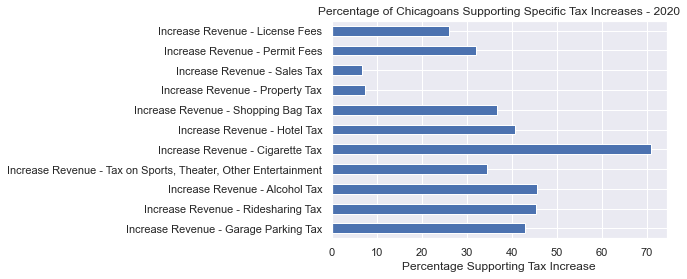

In [123]:
# Visualize data of Chicagoans supporting tax increases
revenue_2020_opinions.plot.barh(legend=False)
plt.xlabel("Percentage Supporting Tax Increase")
plt.title("Percentage of Chicagoans Supporting Specific Tax Increases - 2020")
plt.show()

In [124]:
# Explore 2021 and map that info too for comparison
revenue_2021 = df2021[['Increase Revenue - Property Tax', 'Increase Revenue - Garbage Fee',
       'Increase Revenue - Expand Sales Tax', 'Increase Revenue - Fuel Tax',
       'Increase Revenue - None', 'Increase Revenue - Other']]

#See if any 2021 data is missing from these responses
revenue_2021.isna().sum()

Increase Revenue - Property Tax        0
Increase Revenue - Garbage Fee         0
Increase Revenue - Expand Sales Tax    0
Increase Revenue - Fuel Tax            0
Increase Revenue - None                0
Increase Revenue - Other               0
dtype: int64

In [125]:
# Map data data into numbers so it compares apples to apples with 2020
revenue_2021_mapped = revenue_2021.replace([True, False], [1,0])


In [126]:
# Create chart of all 2021 tax proposals by category
revenue_2021_opinions = (revenue_2021_mapped.sum()/len(revenue_2021_mapped.index))*100

In [127]:
# See how many people support increasing revenue by category in 2021
revenue_2021_opinions = pd.DataFrame(data=revenue_2021_opinions, columns=["Percentage Supporting Revenue Increase 2021"])
revenue_2021_opinions = revenue_2021_opinions.rename(index={"Increase Revenue - Expand Sales Tax": "Increase Revenue - Sales Tax"})
revenue_2021_opinions

,Percentage Supporting Revenue Increase 2021
Increase Revenue - Property Tax,11.579194
Increase Revenue - Garbage Fee,11.978297
Increase Revenue - Sales Tax,11.537458
Increase Revenue - Fuel Tax,21.465463
Increase Revenue - None,38.832951
Increase Revenue - Other,17.583994


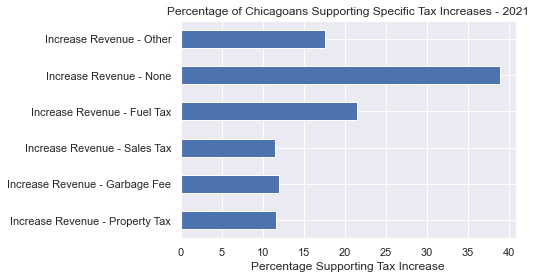

In [128]:
# Visualize 2021 info on supporting each type of tax
revenue_2021_opinions.plot.barh(legend=False)
plt.xlabel("Percentage Supporting Tax Increase")
plt.title("Percentage of Chicagoans Supporting Specific Tax Increases - 2021")
plt.show()

In [129]:
# Join the 2020 and 2021 tax proposals together
revenue_2021_opinions.index.isin(revenue_2020_opinions.index)
total_revenue_opinions = revenue_2021_opinions.join(revenue_2020_opinions, how="outer")


# While almost 40% of Chicagoans supported some form of increased taxes in 2020, that dropped to 15% in 2021.

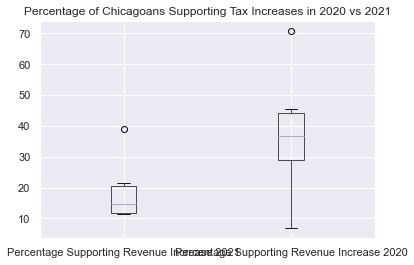

In [130]:
# Show difference of opinions of all categories year-by-year
total_revenue_opinions.boxplot()
plt.title("Percentage of Chicagoans Supporting Tax Increases in 2020 vs 2021")
plt.show()

# Comparing 2021 changes in City Budget to 2021 changes in Chicago Resident Priorities


In [131]:
# Combine all the year-over-year changes into one dataframe
# Add columns to show the 2020 vs 2021 differences
allocation_averages["Adjusted_Mean_2021"] = allocation_averages.Mean_2021/.79211992
allocation_averages["Mean_Difference_yoy"] = allocation_averages.Adjusted_Mean_2021 - allocation_averages.Adjusted_Mean_2020
allocation_averages["Mean_%Difference_yoy"] = (allocation_averages.Adjusted_Mean_2021 - allocation_averages.Adjusted_Mean_2020)/allocation_averages.Adjusted_Mean_2020
allocation_averages

,Mean_2020,Median_2020,Adjusted_Mean_2020,Mean_2021,Median_2021,Adjusted_Mean_2021,Mean_Difference_yoy,Mean_%Difference_yoy
$1000 Assignment - Police,298.996771,250.0,277.155545,64.375659,0.0,81.270092,-195.885453,-0.706771
$1000 Assignment - Other Public Safety,164.368320,150.0,152.361482,99.989948,100.0,126.230822,-26.130660,-0.171504
$1000 Assignment - Infrastructure Services,157.020921,150.0,145.550799,97.751589,100.0,123.405039,-22.145761,-0.152151
$1000 Assignment - Community,142.065522,100.0,131.687868,224.725645,200.0,283.701545,152.013677,1.154348
$1000 Assignment - Streets and Sanitation,86.813840,95.0,80.472230,72.295653,75.0,91.268571,10.796341,0.134162
$1000 Assignment - City Development,69.511594,50.0,64.433886,64.591524,50.0,81.542608,17.108722,0.265524
$1000 Assignment - Libraries,58.893234,50.0,54.591179,66.950910,50.0,84.521180,29.930000,0.548257
$1000 Assignment - Regulatory,51.283807,50.0,47.537608,40.243113,45.0,50.804319,3.266711,0.068718
$1000 Assignment - Cultural Affairs and Special Events,49.850932,47.0,46.209402,61.226406,50.0,77.294365,31.084962,0.672698


In [133]:
# Rename index so it matches the following data frame and is easier to read
new_index = [["City Development",
"Community",
"Cultural Affairs and Special Events",
"Infrastructure Services",
"Libraries",
"Other Public Safety",
"Police",
"Regulatory",
"Streets and Sanitation"]]


allocation_averages = allocation_averages.set_index(new_index)
allocation_averages

,Mean_2020,Median_2020,Adjusted_Mean_2020,Mean_2021,Median_2021,Adjusted_Mean_2021,Mean_Difference_yoy,Mean_%Difference_yoy
City Development,298.996771,250.0,277.155545,64.375659,0.0,81.270092,-195.885453,-0.706771
Community,164.368320,150.0,152.361482,99.989948,100.0,126.230822,-26.130660,-0.171504
Cultural Affairs and Special Events,157.020921,150.0,145.550799,97.751589,100.0,123.405039,-22.145761,-0.152151
Infrastructure Services,142.065522,100.0,131.687868,224.725645,200.0,283.701545,152.013677,1.154348
Libraries,86.813840,95.0,80.472230,72.295653,75.0,91.268571,10.796341,0.134162
Other Public Safety,69.511594,50.0,64.433886,64.591524,50.0,81.542608,17.108722,0.265524
Police,58.893234,50.0,54.591179,66.950910,50.0,84.521180,29.930000,0.548257
Regulatory,51.283807,50.0,47.537608,40.243113,45.0,50.804319,3.266711,0.068718
Streets and Sanitation,49.850932,47.0,46.209402,61.226406,50.0,77.294365,31.084962,0.672698


In [134]:
# Create dataframe with all the information transposed from the City of Chicago's 2021 Budget Proposal
d = {
    "Department": ["City Development",
"Community",
"Cultural Affairs and Special Events",
"Infrastructure Services",
"Libraries",
"Other Public Safety",
"Police",
"Regulatory",
"Streets and Sanitation"],
    "Budget_2020": [320484221-42149506, 1410566406, 42149506, 2246202412, 85236915, 926146482, 1757498349, 
                      88546605, 273635333],
    "Budget_2021": [312914868-24956235,1421180508, 24956235, 2520266797, 111697461,
                    2720397731-1698590492,1698590492,79492644,283948399]
}
city_data = pd.DataFrame(data=d)
city_data["Budget_Change_yoy"] = (city_data.Budget_2021/city_data.Budget_2020) - 1
city_data.Budget_2020 = city_data.Budget_2020/1000000
city_data.Budget_2021 = city_data.Budget_2021/1000000
city_data

city_data.Budget_2020.sum()
city_data.Budget_2021.sum()

city_data = city_data.set_index("Department")
city_data["Survey_Change_yoy"] = allocation_averages["Mean_%Difference_yoy"]
city_data["Survey_Results_2021"] = allocation_averages["Adjusted_Mean_2021"]
city_data


,Budget_2020,Budget_2021,Budget_Change_yoy,Survey_Change_yoy,Survey_Results_2021
Department,,,,,
City Development,278.334715,287.958633,0.034577,-0.706771,81.270092
Community,1410.566406,1421.180508,0.007525,-0.171504,126.230822
Cultural Affairs and Special Events,42.149506,24.956235,-0.407912,-0.152151,123.405039
Infrastructure Services,2246.202412,2520.266797,0.122012,1.154348,283.701545
Libraries,85.236915,111.697461,0.310435,0.134162,91.268571
Other Public Safety,926.146482,1021.807239,0.103289,0.265524,81.542608
Police,1757.498349,1698.590492,-0.033518,0.548257,84.521180
Regulatory,88.546605,79.492644,-0.102251,0.068718,50.804319
Streets and Sanitation,273.635333,283.948399,0.037689,0.672698,77.294365


In [135]:
# Check correlation between resident priorities and budget priorities
print("Correlation between residents and the city's priorities:", b.corr(a))

Correlation between residents and the city's priorities: -0.13649704372942023


In [137]:
# Run two-sample t-test after normalizing the data to see how the y/y change compares
# Null hypothesis is that the means are the same, so we'll need a very low p-value to reject the null. 
from scipy.stats import ttest_rel
from sklearn import preprocessing

a = city_data.Survey_Change_yoy
b = city_data.Budget_Change_yoy


x_array = np.array(a)
y_array = np.array(b)
x = preprocessing.normalize([x_array])
y = preprocessing.normalize([y_array])

#Test to see if the means are the same
print(ttest_rel(x,y, axis=1))


Ttest_relResult(statistic=array([0.78307583]), pvalue=array([0.45613624]))


# The correlation between resident priorities and government priorities are negative! 
However, the two-sample t-test did not prove anything, as there were only 8 degrees of freedom and not strong enough data to show different means. 